<img src= "https://images.ctfassets.net/4cd45et68cgf/5y7i4snzpqkr2oHRCRAkN4/c144749aa0df745e43367744af149f66/Android_Collage_1920x1080__UCAN_En.jpg">

                                            
# <center> 🔧🔨1.Importing Libraries Required</center>

In [1]:

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


# <center> 📅2. Importing  and observing Dataset</center>

In [2]:
df =  pd.read_csv(r"C:\Users\Asus-pc\selu shit\Projects\Netflix_titles_upto 2021\netflix_titles.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [3]:
#Shape
print("Number of Rows:", df.shape[0])
print("Number of Columns:" , df.shape[1])

Number of Rows: 8807
Number of Columns: 12


In [4]:
list(df.columns)


['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [5]:
#datatype of each column
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
#Null values per colmn
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
#duplicates
df.duplicated().sum()

0

In [8]:
#latest release year
max(df.release_year)

2021

In [9]:
#categories of various kinds
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
#different age ratings
df['rating'].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [11]:
# different genres

genre_list  =  pd.unique(df.listed_in.str.split(",", expand =  True).stack())
for i  in range(len(genre_list)):
    genre_list[i] = genre_list[i].strip()

genre_list =  list(pd.unique(genre_list))
genre_list




['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Horror',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Comedies',
 'Spanish-Language TV Shows',
 'Thrillers',
 'Romantic Movies',
 'Music & Musicals',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'TV Thrillers',
 "Kids' TV",
 'Action & Adventure',
 'TV Sci-Fi & Fantasy',
 'Classic Movies',
 'Anime Features',
 'Sports Movies',
 'Anime Series',
 'Korean TV Shows',
 'Science & Nature TV',
 'Teen TV Shows',
 'Cult Movies',
 'TV Shows',
 'Faith & Spirituality',
 'LGBTQ Movies',
 'Stand-Up Comedy',
 'Movies',
 'Stand-Up Comedy & Talk Shows',
 'Classic & Cult TV']

### Observations
* Scope of the data is from the year 1925 to 2021.
* There are no duplicates in the data.
* Column 'date_added' should be conveverted into datetime datatype.
* Highest number of null values are present in the director  column followed by cast country and date_added
* Rating columns has '74 min' , '66min' and '84 min' as ratings and also 'NR'(not rated) , 'UR'(unrated) are practically the same thing,both issues must be resloved.
* date_added  column could be futher divided into new colums based on year and month
* Listed_in column should be renamed to 'Genre' for ease


#  <center> 3. 🧹🧼Cleaning</center>

# 3.1 Cleaning string columns

In [12]:
#Removing Whitspaces from columns containing strings

columns  = list(df.columns)
columns.remove('release_year')

for i in columns:
    df[i] = df[i].str.strip()


In [13]:
#Replacing nan with "" in string datatype columns

str_cols =['director', 'cast', 'country', 'rating', 'date_added']

for column in str_cols:
    df[column] = df[column].fillna("")

In [14]:
#Renaming listed_in column

df  = df.rename(columns= {'listed_in':'Genre'})


# 3.2 Fixing Rating Column

In [15]:
#1. Adding all the columns with rating 'UR' into 'NR'
for i in range(len(df)):
    if df['rating'].iloc[i] == 'UR':
        df['rating'].iloc[i] = 'NR'

#Making sure it worked
df['rating'].unique()

C:\Users\Asus-pc\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', '',
       'TV-Y7-FV'], dtype=object)

In [16]:
#2.Inspecting columns with '77min' , '66min' , '84min' rating
weird_rating = ['74 min', '84 min', '66 min']
for i in range(len(df)):
    if df['rating'].iloc[i] in weird_rating:
        print(df.iloc[i])


show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                     74 min
duration                                                      NaN
Genre                                                      Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object
show_id                                                     s5795
type                                                        Movie
title                                       Louis 

#### Upon inspection,it appears that These weird ratings actually belong in the  duration column.

#### let's make it so

In [17]:
#Moving wrong ratings to duration 
index  = [ 5794,5541,5813]

for i in index:
    x =  df["rating"].iloc[i].split(" ")
    du =  x[0]
    df['duration'].iloc[i] = du
    df['rating'].iloc[i] = 'NR'


#Checking to make sure it worked
for i in index:
    print(df.iloc[i])

show_id                                                     s5795
type                                                        Movie
title                                       Louis C.K.: Hilarious
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                     September 16, 2016
release_year                                                 2010
rating                                                         NR
duration                                                       84
Genre                                                      Movies
description     Emmy-winning comedy writer Louis C.K. brings h...
Name: 5794, dtype: object
show_id                                                     s5542
type                                                        Movie
title                                             

   # 3.3 Splitting Date added into multiple columns

In [18]:
#Splitting date_added into multiple columns

#1.rows with null values
null_rows = []
for i in range(len(df)):
    if df['date_added'].iloc[i] == "":
        null_rows.append(i)

#2. Month and year
month_added = []
year_added = []

for i in range(len(df)):
    #replacing nan values with 0
    if i in null_rows:
        month_added.append(0)
        year_added.append(0)
    else:
        date  =  df['date_added'].iloc[i].split(" ")
        month_added.append(date[0])
        year_added.append(date[2])

#3.Turning month into month number
for i,month in enumerate(month_added):
    if month !=  0:
        datetime_obj = datetime.strptime(month ,"%B")
        month_number = datetime_obj.month
        month_added[i] = month_number


#checking 

print(set(month_added))
print(set(year_added))

#inserting new columns into the dataframe

df.insert(7, "month_added" , month_added , allow_duplicates=  True)
df.insert(8, "year_added" , year_added , allow_duplicates=  True)
        

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
{'2009', 0, '2018', '2013', '2017', '2021', '2014', '2011', '2016', '2008', '2019', '2020', '2010', '2015', '2012'}


# 3.4 Getting a list of countries 

In [19]:
#Creating a function obtain unique values from columns containing strings
def getset(data):
    data_list =  set()
    for v in data:
        values = v.split(", ")
        for i  in values:
            data_list.add(i)
    return list(data_list)

In [20]:
Country_list  =  getset(df['country'])
Country_list

['',
 'Finland',
 'Senegal',
 'Netherlands',
 'Thailand',
 'Malawi',
 'Venezuela',
 'Pakistan',
 'Italy',
 'Paraguay',
 'Canada',
 'South Korea',
 'Ukraine',
 'Panama',
 'Luxembourg',
 'Uruguay',
 'Armenia',
 'Angola',
 'Philippines',
 'Azerbaijan',
 'New Zealand',
 'East Germany',
 'Botswana',
 'Belarus',
 'United Kingdom',
 'Belgium',
 'Malaysia',
 'Burkina Faso',
 'Czech Republic',
 'Montenegro',
 'Cambodia,',
 'Qatar',
 'Iceland',
 'Georgia',
 'Taiwan',
 'Ireland',
 'Mexico',
 'Brazil',
 'Lebanon',
 'Kenya',
 'Syria',
 'Colombia',
 'Albania',
 'Zimbabwe',
 'Hungary',
 'Saudi Arabia',
 'Cyprus',
 'Greece',
 'Namibia',
 'France',
 'Switzerland',
 'Poland,',
 'Bulgaria',
 'Sweden',
 'Guatemala',
 'Australia',
 'Sri Lanka',
 'Jamaica',
 'Mauritius',
 'Iraq',
 'Latvia',
 'Slovenia',
 'Cambodia',
 'Israel',
 'Dominican Republic',
 'Slovakia',
 'Peru',
 'Lithuania',
 'Denmark',
 'China',
 'Nepal',
 'Ghana',
 'Malta',
 'Russia',
 'Serbia',
 'United Kingdom,',
 'West Germany',
 'South Afric

# 3.5 Dropping columns not required

In [21]:
df =  df.drop(columns = ['description' , 'cast'])
df

,show_id,type,title,director,country,date_added,month_added,year_added,release_year,rating,duration,Genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",9,2021,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,,South Africa,"September 24, 2021",9,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,,"September 24, 2021",9,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,,,"September 24, 2021",9,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,,India,"September 24, 2021",9,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,United States,"November 20, 2019",11,2019,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,,,"July 1, 2019",7,2019,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,"November 1, 2019",11,2019,2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",1,2020,2006,PG,88 min,"Children & Family Movies, Comedies"


#  <center> 4.🔎📊Analysis</center>

## 4.1 What is the ratio of shows Vs movies on Netflix?

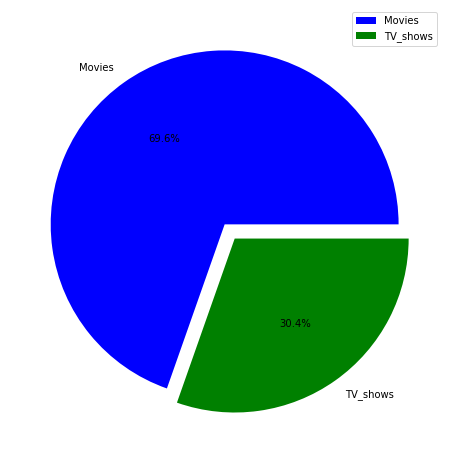

In [22]:
#Creating two variables fstoring number of tv_shows and movies respectively
x = df['type'].value_counts()
Movies =  x[0]
TV_shows =  x[1]

#Creating pie chart
ax =  plt.subplots(figsize = (15,8))
explode =  [0,0.1]
colors = ["blue", "green"]
slices = [Movies , TV_shows]
labels = ['Movies','TV_shows']

plt.pie(slices , labels = labels, colors =  colors ,explode =  explode,autopct = "%1.1f%%" )
plt.legend()


## 4.2 What amount of content was added each year?

<AxesSubplot:xlabel='year_added', ylabel='count'>

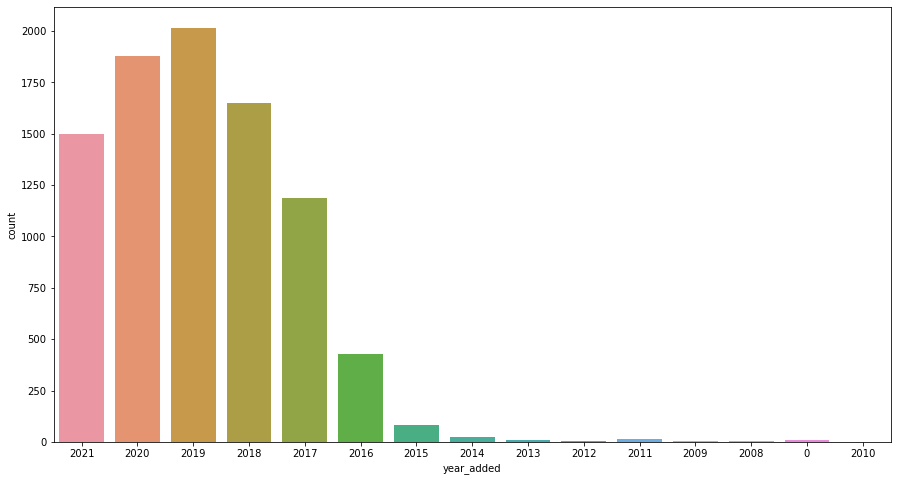

In [23]:
ax =  plt.subplots(figsize = (15,8))
sns.countplot(data =  df , x = 'year_added')

## 4.3 What are some of the oldest Tv shows and movies on Netflix?

In [24]:
oldies  =  df.sort_values('release_year' , ascending =  True)
oldies[['title' ,'release_year']].head(15)

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


## 4.4  What countries produce the most amount of content?

In [25]:
#modifying earlier function to create a list of country names 
def getlist(data):
    data_list =  list()
    for v in data:
        values = v.split(", ")
        for i  in values:
            data_list.append(i)
    return list(data_list)

#counting occurence of each countryname
country_list =  getlist(df['country'])
country_count = pd.value_counts(country_list).to_frame(name = "Occurence").reset_index()
country_count.head(15)

country_count.to_csv('country_occurence.csv')

#the empty value is  count of shows where country was not mentioned 

##  4.5 Popular directors by amount of content 

In [26]:
director_list = getlist(df['director'])
director_count = pd.value_counts(director_list).to_frame(name = "Occurence").reset_index()
director_count.head(10)



,index,Occurence
0,,2634
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Jay Chapman,12


## 4.6 What  genre  is dominating  Netflix?

In [29]:
genre_list =  getlist(df['Genre'])
pd.value_counts(genre_list)
genre_count = pd.value_counts(genre_list).to_frame(name = 'Occurence').reset_index()

genre_count.to_csv('genre_list.csv')
